# Network Analysis 

This Jupyter notebook demostrates the network anaysis, including finding shortest path and generate isochrones from the road network accessibility. 

We are using Urbana-Champaign, IL, US as our study area. And this notebook uses geospatial libraries to simulate the shortest path from point to another and isochrones analysis with the problem of road network accessibility.

# Notebook Outline
- [Routing](#Routing)
    - [Setup](#setup)
    - [Origin and Destination](#OD)
    - [Find the shortest path](#SP)
- [Isochrones Analysis](#isochrones)
    - [Setup](#su)
    - [Visulization](#vis)


<a id='Routing'></a>
## Routing

The first one is  an interactive demo that shows user how to use osmnx and openstreetmap to find the shortest path between two locations in the real world.

OSMnx is a python toolkit for street networks, incluging retrieving, modeling, analyzing, and visualizing street networks and other spatial data from OpenStreetMap.

Boeing, G. 2017. "OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks." Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

<a id='setup'></a>
### Set up the environment by importing libraries

In [1]:
import numpy as np
import osmnx as ox
import networkx as nx
import folium

import matplotlib.pyplot as plt

#Enable inline plotting of maps
%matplotlib inline

print (ox.__version__)
ox.config(log_console=True, use_cache=True)

0.11


### Defined the study area at the city of Urbana-Champaign, IL, US

In [2]:
#Define the study area
places = ['Champaign, Illinois','Urbana, Illinois']

### Read the network file at Urbana-Champaign and plot the area

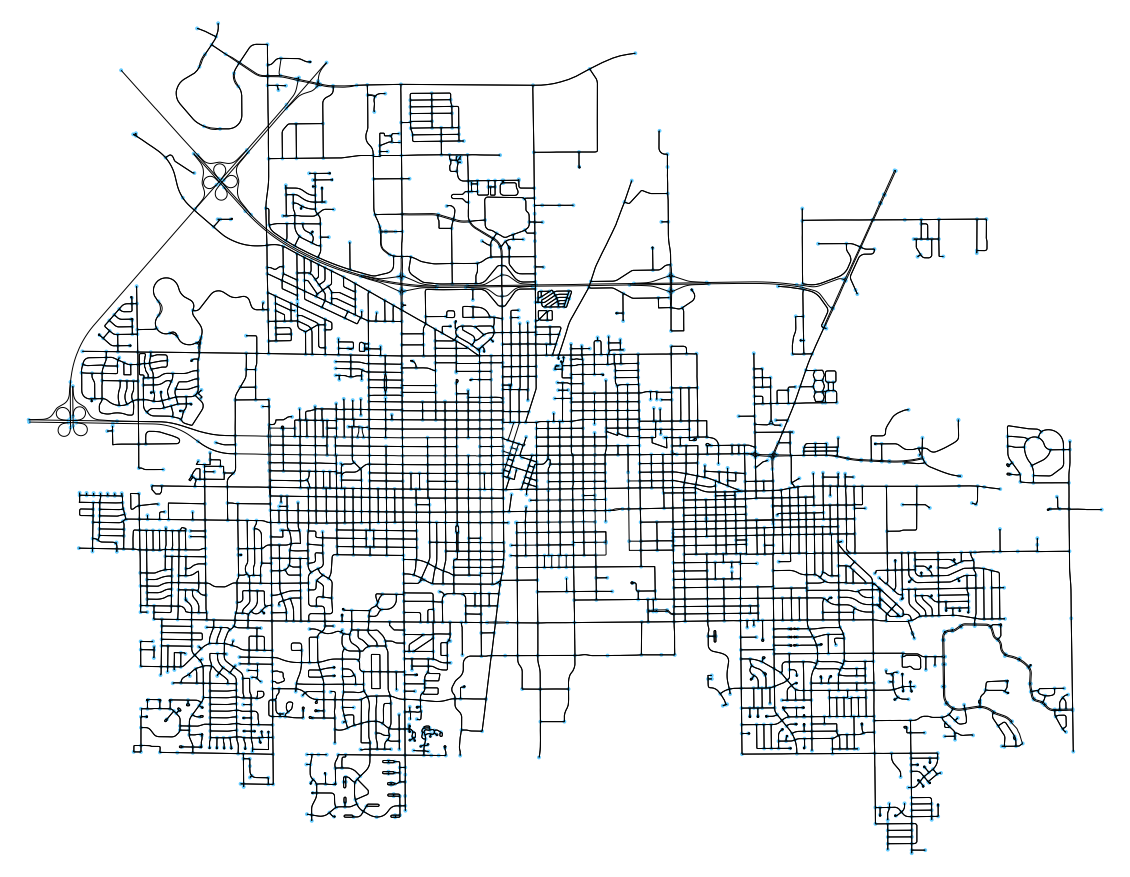

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9d648c0748>)

In [3]:
#Note - this may take some time...
# Choose one type of network
#[ 'all_private','all','drive','drive_service', 'bike','walk']:#

G = ox.graph_from_place(places, network_type='drive')

#The step give projects to UTM 
#ox.plot_graph(ox.project_graph(G));
#ox.plot_graph(G);
ox.plot_graph(G, fig_height=20, fig_width=20, edge_color='black')

#We do not save files in order to save time
#filenames = 'Urban-Champaign-Net'
#ox.save_graph_shapefile(G, filename=filenames)
#ox.save_graphml(G, filename='Urban-Champaign-Net.graphml')


<a id='OD'></a>

### Define origin and destination location by providing longitude and latitude

Plot the origin and destination point in the network graph of Urbana-Champaign, the origin is shown in red and destination is shown in blue.

In [4]:
#origin = ox.utils.geocode('2012 S Orchard St,Urbana, IL')
#destination = ox.utils.geocode('1301 W Green St, Urbana, IL')
origin = (40.097468, -88.214171)
destination =(40.10948505, -88.2260316492452)

### Show the origin point and destination point on the map

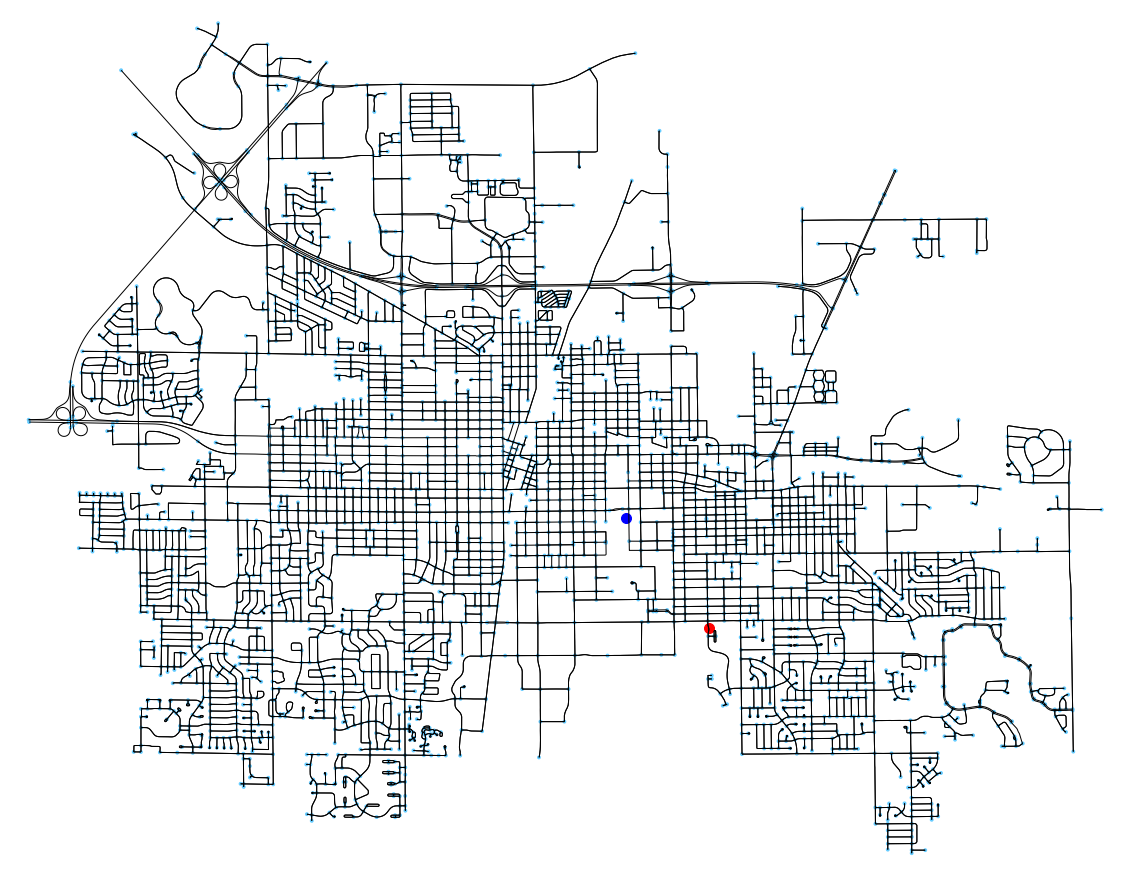

In [5]:

fig, ax = ox.plot_graph(G, fig_height=20, fig_width=20, 
                        show=False, close=False, 
                        edge_color='black')

ax.scatter(origin[1], origin[0], c='red', s=100)
ax.scatter(destination[1], destination[0], c='blue', s=100)

plt.show()

### the points do not locate on the network nodes. We get the nearest network node to finding shoretest path  wtih osmnx

In [6]:

origin_node =  ox.get_nearest_node(G, origin) 
destination_node = ox.get_nearest_node(G, destination )

### Show the origin_node and the destination_node

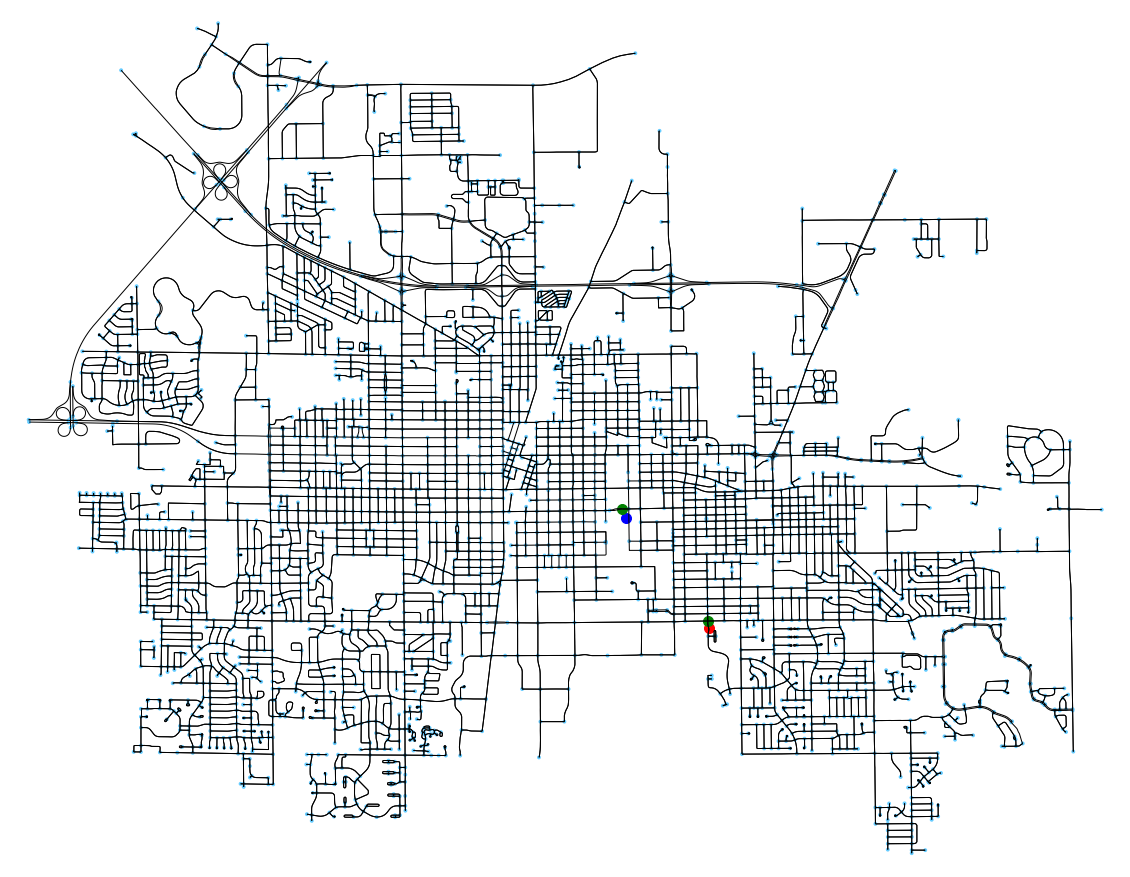

In [7]:

fig, ax = ox.plot_graph(G, fig_height=20, fig_width=20, 
                        show=False, close=False, 
                        edge_color='black')

ax.scatter(origin[1], origin[0], c='red', s=100)
ax.scatter(destination[1], destination[0], c='blue', s=100)

ax.scatter(G.nodes[origin_node]['x'], G.nodes[origin_node]['y'], c='green', s=100)
ax.scatter(G.nodes[destination_node]['x'], G.nodes[destination_node]['y'], c='green', s=100)

plt.show()

<a id='SP'></a>
### Find the shortest path between origin and destination

The shortes path algorithm in this demo is from NetworkX.

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks (https://networkx.github.io/).



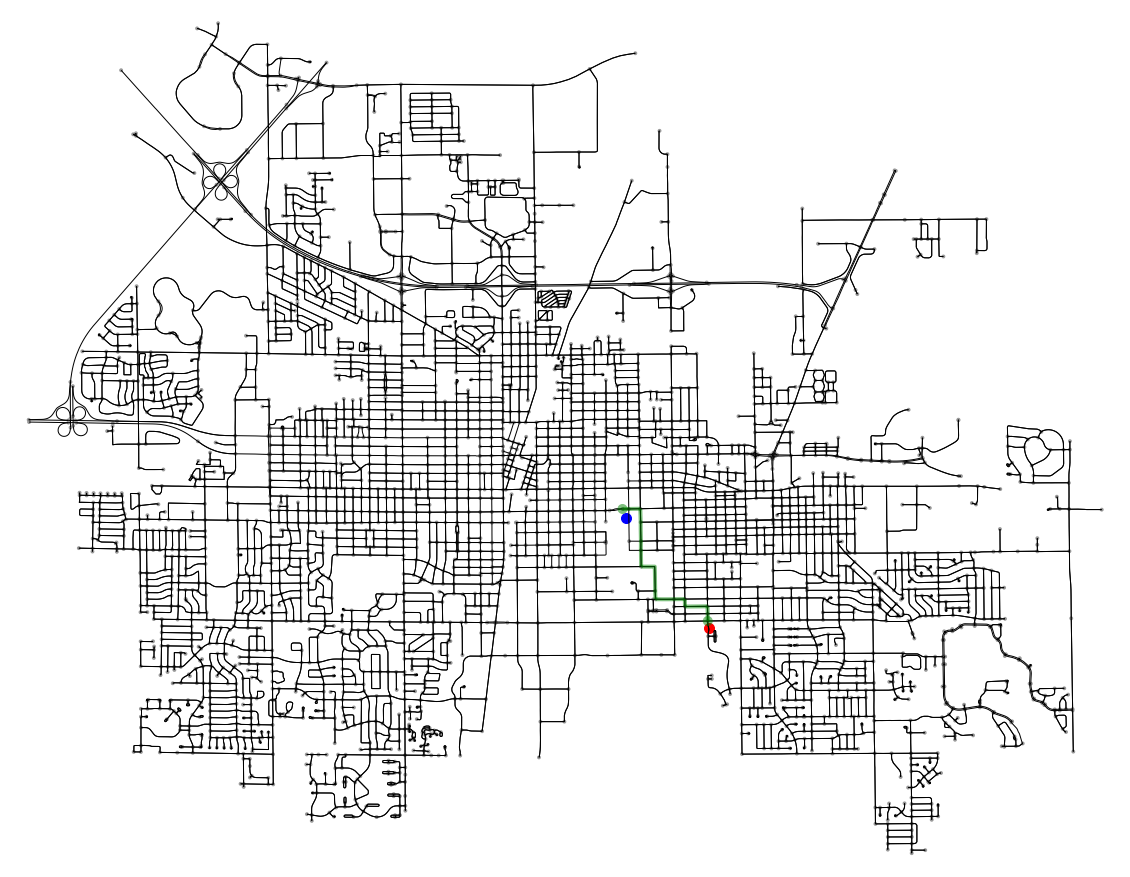

In [8]:
route = nx.shortest_path(G, origin_node, destination_node)

fig, ax = ox.plot_graph_route(G, route, fig_height=20, fig_width=20, 
                    show=False, close=False, 
                    edge_color='black',
                    orig_dest_node_color='green',
                    route_color='green')

ax.scatter(origin[1], origin[0], c='red', s=100)
ax.scatter(destination[1], destination[0], c='blue', s=100)

plt.show()

### Find the shortest distance between two random points in Urbana-Champaign

#### Using osmnx to compute the shortest path between two random nodes along road networks

Define the random network nodes and ompute the shortest path between two random nodes along road networks


In [9]:

route = nx.shortest_path(G, np.random.choice(G.nodes()), np.random.choice(G.nodes()))


#### Show the shortest path between two random nodes along road networks

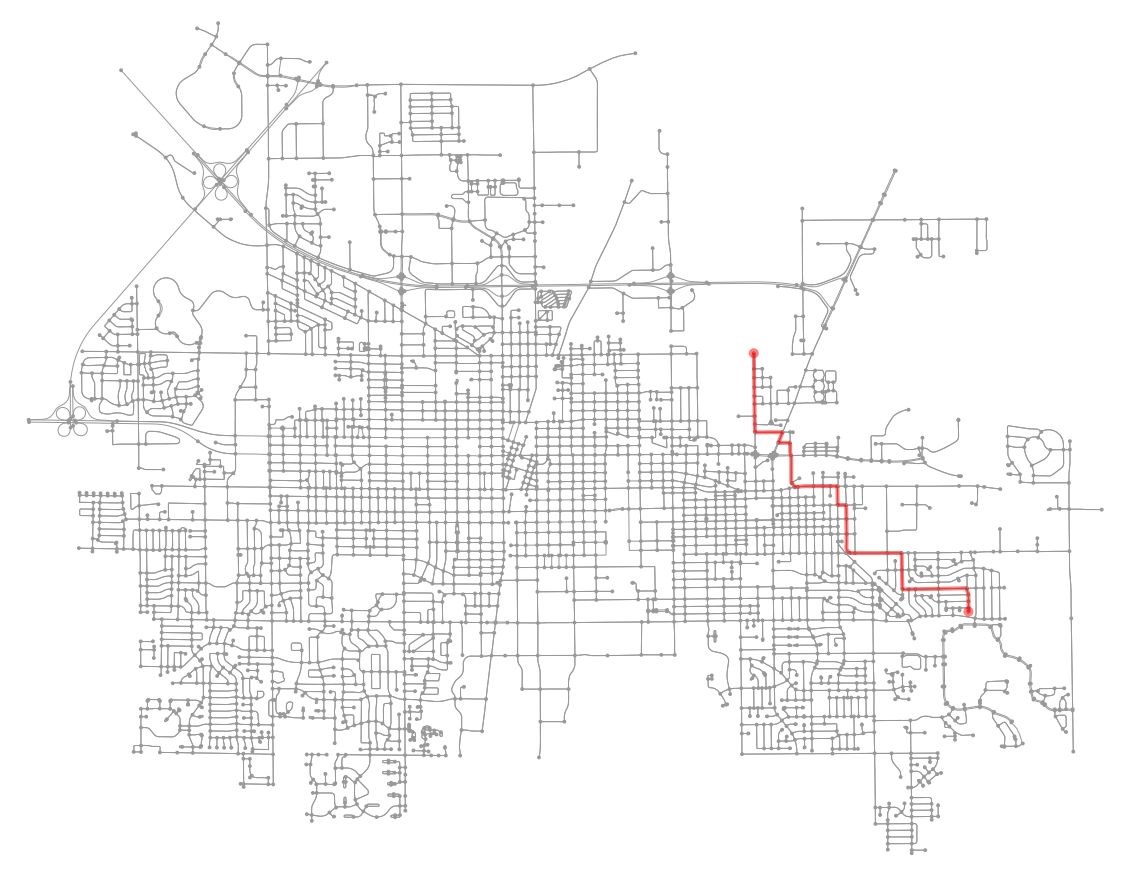

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9d6f407978>)

In [10]:

#route = nx.shortest_path(G, np.random(G.nodes), np.random(G.nodes))
ox.plot_graph_route(G, route, fig_height=20, fig_width=20)

<a id='isochrones'></a>
## Walking isochrones from road network center with different time

The second demonstration is about generating isochrones from a network accessibility operation.

<a id='su'></a>
### The first step is setting the walking network, the accessible time for trips are seting to 5, 10, 15, 20, and 25 minutes. The walking speed in 4.5 km/hour.

In [11]:
t_network_type = 'walk'
trip_times = [5, 10, 15, 20, 25] #in minutes
travel_speed = 4.5 #walking speed in km/hour


### Get the walk road network using osmnx

In [12]:

G = ox.graph_from_place(places, network_type=t_network_type)


### Get the center of the road network and retroject the road network, we find the nearest network node around the center point in the Urbana-Champine area.

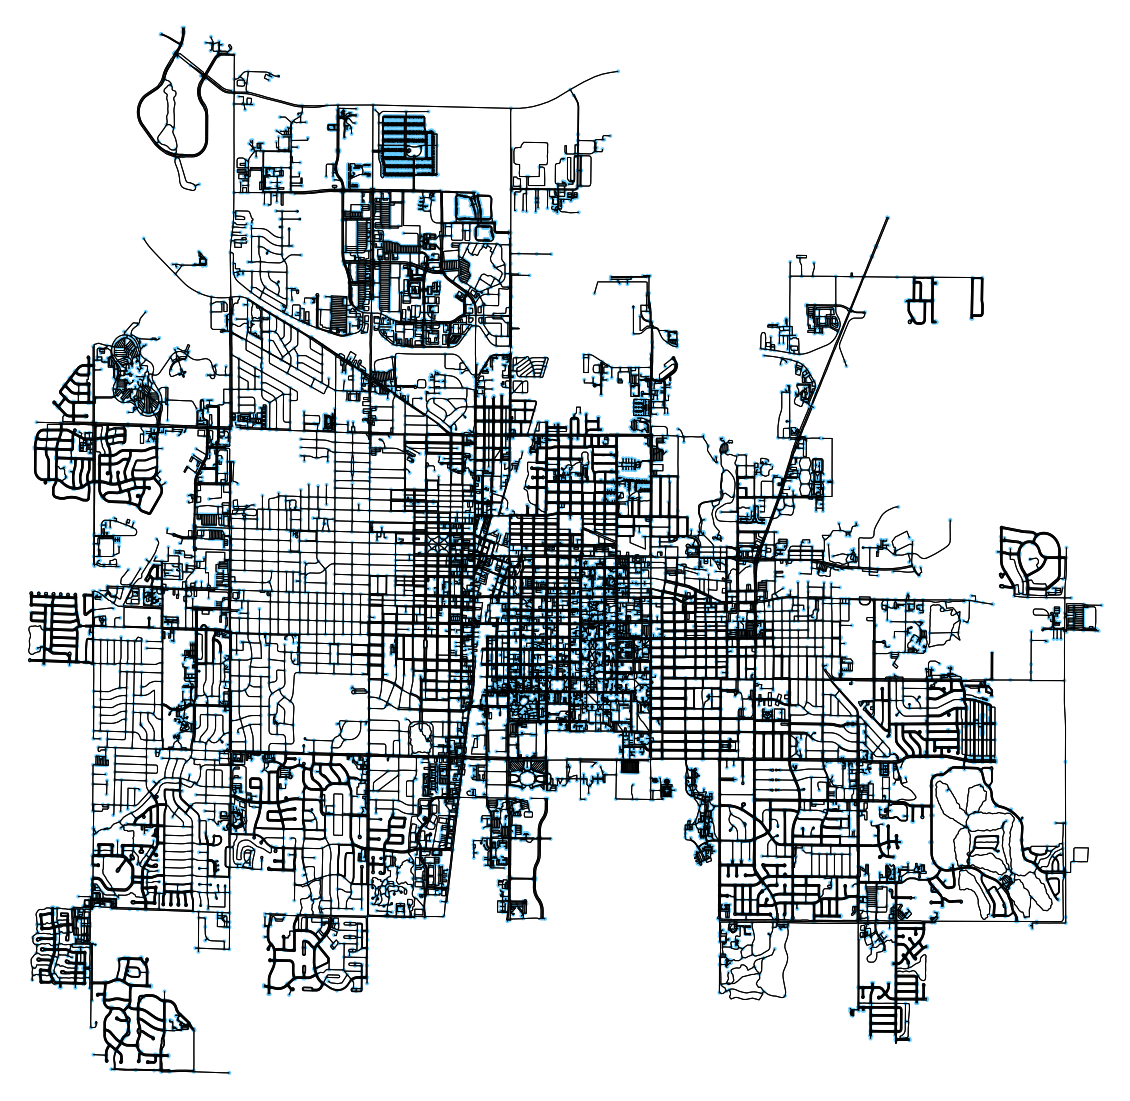

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9d64637128>)

In [13]:

gdf_nodes = ox.graph_to_gdfs(G, edges=False)
x, y = gdf_nodes['geometry'].unary_union.centroid.xy
center_node = ox.get_nearest_node(G, (y[0], x[0]))
G = ox.project_graph(G)

ox.plot_graph(G, fig_height=20, fig_width=20, edge_color='black')

### add an edge attribute for time in minutes required to traverse each edge

In [14]:
meters_per_minute = travel_speed * 1000 / 60 #km per hour to meters per minute
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute

### get one color for each isochrone

In [15]:

iso_colors = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.3, return_hex=True)

### color the network nodes according to isochrone then plot the road network

Show accessibility from the original center node with different trips' time

In [16]:
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]

<a id='vis'></a>
### First show the isochrone nodes and then plot the road network

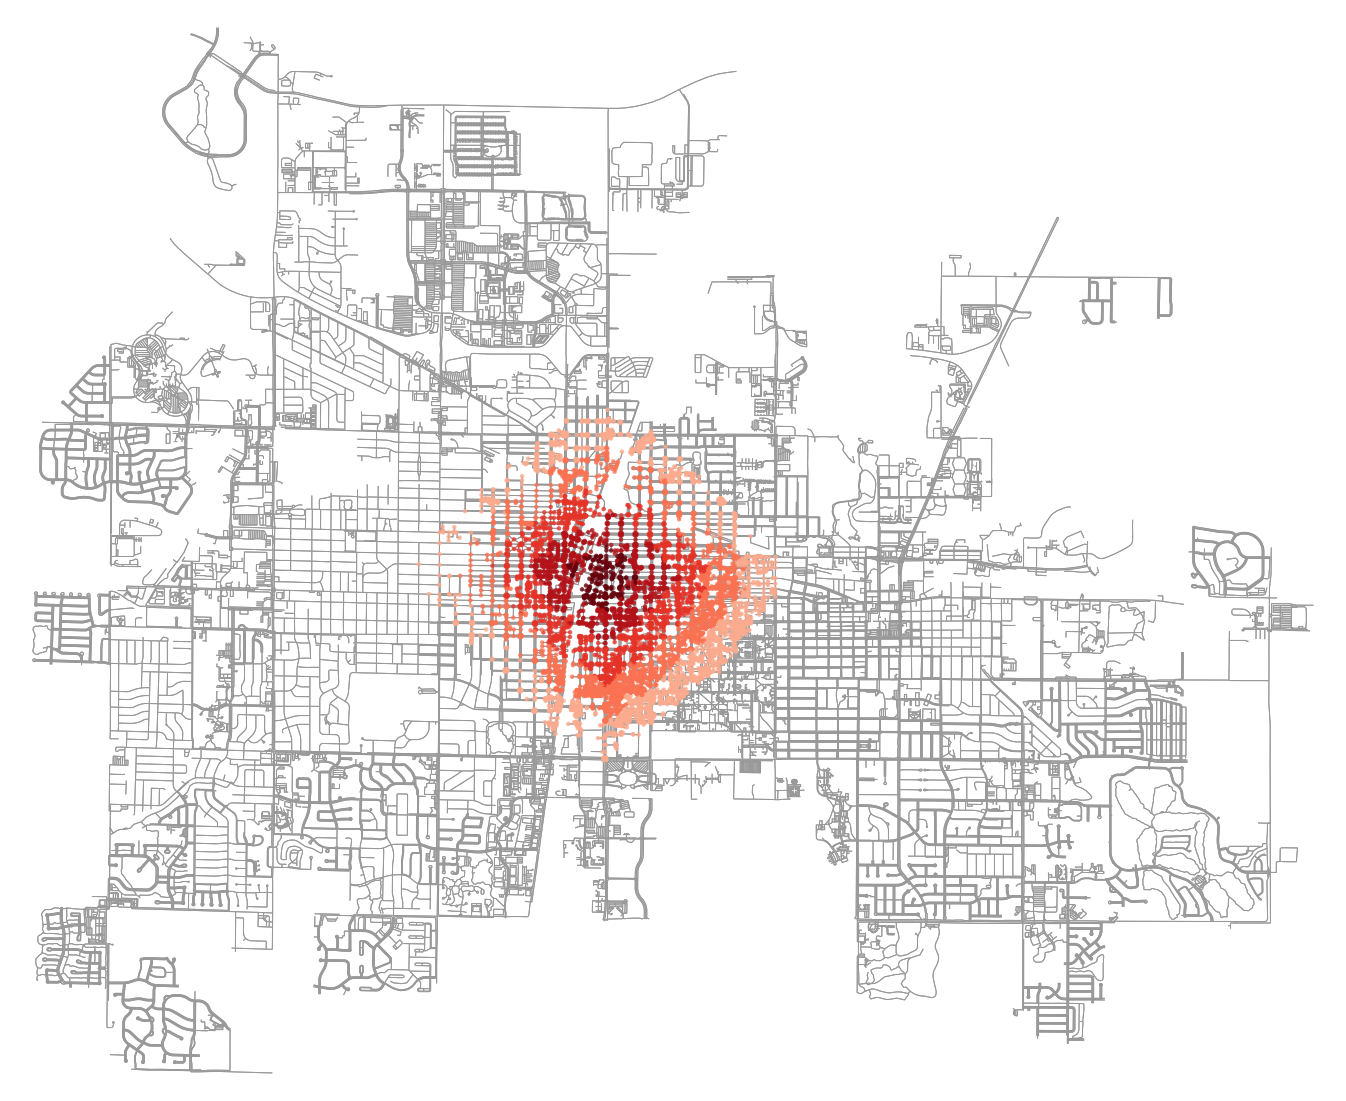

CPU times: user 14.1 s, sys: 145 ms, total: 14.3 s
Wall time: 14 s


In [17]:

%time fig, ax = ox.plot_graph(G, fig_height=20, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

### make the isochrone polygons

we extract the network nodes as point clouds and generate a convex hull around each dataset.

In [18]:

from shapely.geometry import Point, Polygon, LineString
from descartes import PolygonPatch
import geopandas as gpd

isochrone_polys = []
for trip_time in sorted(trip_times, reverse=True):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    isochrone_polys.append(bounding_poly)


### plot the road network, then add isochrones as colored descartes polygon patches

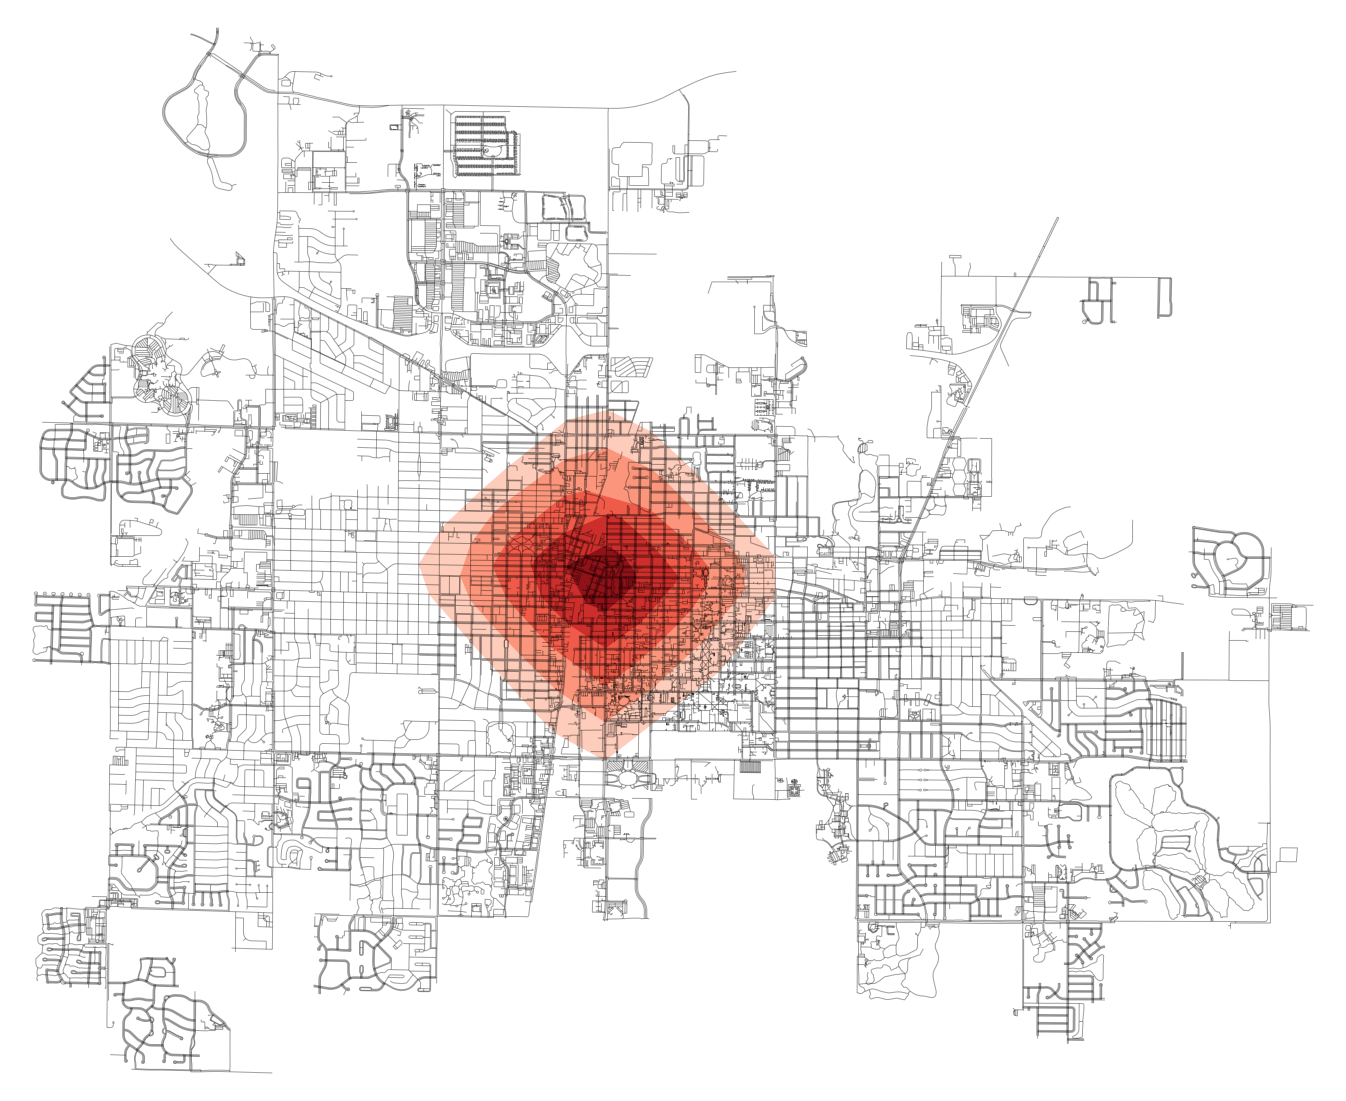

In [19]:
fig, ax = ox.plot_graph(G, fig_height=20, show=False, close=False, edge_color='k', edge_alpha=0.2, node_color='none')
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec='none', alpha=0.6, zorder=-1) #-1
    ax.add_patch(patch)
plt.show()